In [372]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from reviews import *


In [8]:
df = pd.read_csv('Ecommerce_Delivery_Analytics_New.csv')
df.head()

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No


In [376]:
df.tail()

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
99995,ORD099996,CUST5324,JioMart,49:29.5,24,Dairy,289,Packaging could be better.,3,No,No
99996,ORD099997,CUST1677,JioMart,18:29.5,19,Snacks,322,Good quality products.,4,No,No
99997,ORD099998,CUST8198,JioMart,27:29.5,41,Dairy,135,"Fast delivery, great service!",5,Yes,No
99998,ORD099999,CUST9975,JioMart,14:29.5,31,Grocery,973,Quick and reliable!,5,No,No
99999,ORD100000,CUST3748,JioMart,41:29.5,34,Fruits & Vegetables,453,Packaging could be better.,3,No,No


In [378]:
df.describe()

,Delivery Time (Minutes),Order Value (INR),Service Rating
count,100000.000000,100000.000000,100000.000000
mean,29.536140,590.994400,3.240790
std,9.958933,417.409058,1.575962
min,5.000000,50.000000,1.000000
25%,23.000000,283.000000,2.000000
50%,30.000000,481.000000,3.000000
75%,36.000000,770.000000,5.000000
max,76.000000,2000.000000,5.000000


In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Order ID                 100000 non-null  object
 1   Customer ID              100000 non-null  object
 2   Platform                 100000 non-null  object
 3   Order Date & Time        100000 non-null  object
 4   Delivery Time (Minutes)  100000 non-null  int64 
 5   Product Category         100000 non-null  object
 6   Order Value (INR)        100000 non-null  int64 
 7   Customer Feedback        100000 non-null  object
 8   Service Rating           100000 non-null  int64 
 9   Delivery Delay           100000 non-null  object
 10  Refund Requested         100000 non-null  object
dtypes: int64(3), object(8)
memory usage: 8.4+ MB


In [382]:
print(df.dtypes)

Order ID                   object
Customer ID                object
Platform                   object
Order Date & Time          object
Delivery Time (Minutes)     int64
Product Category           object
Order Value (INR)           int64
Customer Feedback          object
Service Rating              int64
Delivery Delay             object
Refund Requested           object
dtype: object


In [384]:
print(df.isnull().sum())

Order ID                   0
Customer ID                0
Platform                   0
Order Date & Time          0
Delivery Time (Minutes)    0
Product Category           0
Order Value (INR)          0
Customer Feedback          0
Service Rating             0
Delivery Delay             0
Refund Requested           0
dtype: int64


In [386]:
df.drop_duplicates()

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No
...,...,...,...,...,...,...,...,...,...,...,...
99995,ORD099996,CUST5324,JioMart,49:29.5,24,Dairy,289,Packaging could be better.,3,No,No
99996,ORD099997,CUST1677,JioMart,18:29.5,19,Snacks,322,Good quality products.,4,No,No
99997,ORD099998,CUST8198,JioMart,27:29.5,41,Dairy,135,"Fast delivery, great service!",5,Yes,No
99998,ORD099999,CUST9975,JioMart,14:29.5,31,Grocery,973,Quick and reliable!,5,No,No


In [388]:
len(df)

100000

In [390]:
top_five=df.sort_values(by='Order Value (INR)',ascending=True) 
top_five.head(5)


,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
89116,ORD089117,CUST4106,Blinkit,47:29.5,29,Fruits & Vegetables,50,"Not fresh, disappointed.",2,No,Yes
30186,ORD030187,CUST2054,Blinkit,39:29.5,33,Fruits & Vegetables,50,Good quality products.,4,No,No
56636,ORD056637,CUST7738,JioMart,08:29.5,19,Snacks,50,"Not fresh, disappointed.",2,No,Yes
2387,ORD002388,CUST2245,Blinkit,05:29.5,35,Snacks,50,Excellent experience!,5,No,No
71439,ORD071440,CUST5889,Blinkit,21:29.5,34,Snacks,50,"Horrible experience, never ordering again.",1,No,Yes


In [392]:
top_five=df.sort_values(by='Service Rating',ascending=True)
top_five.head(5)

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
86003,ORD086004,CUST3176,Swiggy Instamart,59:29.5,37,Fruits & Vegetables,295,Wrong item delivered.,1,No,Yes
90607,ORD090608,CUST9789,JioMart,30:29.5,5,Fruits & Vegetables,579,Wrong item delivered.,1,No,Yes
60112,ORD060113,CUST6359,Blinkit,31:29.5,35,Snacks,465,"Horrible experience, never ordering again.",1,No,Yes
24236,ORD024237,CUST5166,Swiggy Instamart,53:29.5,44,Dairy,174,Wrong item delivered.,1,Yes,Yes
90611,ORD090612,CUST7042,Blinkit,58:29.5,26,Grocery,647,Wrong item delivered.,1,No,Yes


In [394]:
least_five=df.sort_values(by='Order Value (INR)',ascending=False)
least_five.head(5)

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
98210,ORD098211,CUST5408,JioMart,03:29.5,44,Personal Care,2000,"Very late delivery, not happy.",2,Yes,Yes
68551,ORD068552,CUST8187,JioMart,38:29.5,33,Personal Care,2000,Excellent experience!,5,No,No
12683,ORD012684,CUST3486,Swiggy Instamart,17:29.5,11,Personal Care,2000,Good quality products.,4,No,No
21023,ORD021024,CUST9108,Swiggy Instamart,36:29.5,16,Personal Care,2000,Packaging could be better.,3,No,No
70417,ORD070418,CUST3057,JioMart,40:29.5,36,Personal Care,2000,Excellent experience!,5,No,No


In [396]:
least_five=df.sort_values(by='Service Rating',ascending=False)
least_five.head(5)

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
31472,ORD031473,CUST4667,Blinkit,36:29.5,25,Personal Care,1870,"Easy to order, loved it!",5,No,No
31460,ORD031461,CUST4692,JioMart,06:29.5,54,Personal Care,122,Very satisfied with the service.,5,Yes,No
68720,ORD068721,CUST3037,Blinkit,25:29.5,36,Personal Care,652,Very satisfied with the service.,5,No,No
68719,ORD068720,CUST5368,JioMart,46:29.5,23,Grocery,1293,Very satisfied with the service.,5,No,No


In [398]:
avg_price_df=df.groupby('Platform')['Service Rating'].mean()
avg_price_df

Platform
Blinkit             3.233844
JioMart             3.245147
Swiggy Instamart    3.243415
Name: Service Rating, dtype: float64

In [400]:
avg_price_df=df.groupby('Product Category')['Service Rating'].mean()
avg_price_df

Product Category
Beverages              3.247581
Dairy                  3.242688
Fruits & Vegetables    3.230038
Grocery                3.217841
Personal Care          3.253130
Snacks                 3.253637
Name: Service Rating, dtype: float64

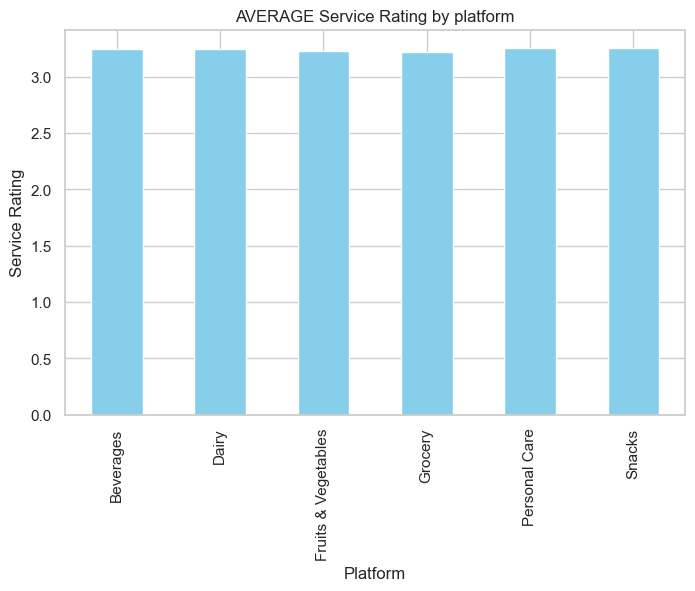

In [402]:
avg_price_df.plot(kind='bar',figsize=(8,5),color='skyblue')
plt.xlabel('Platform')
plt.ylabel('Service Rating')
plt.title("AVERAGE Service Rating by platform")
plt.show()

D:\Users\praga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


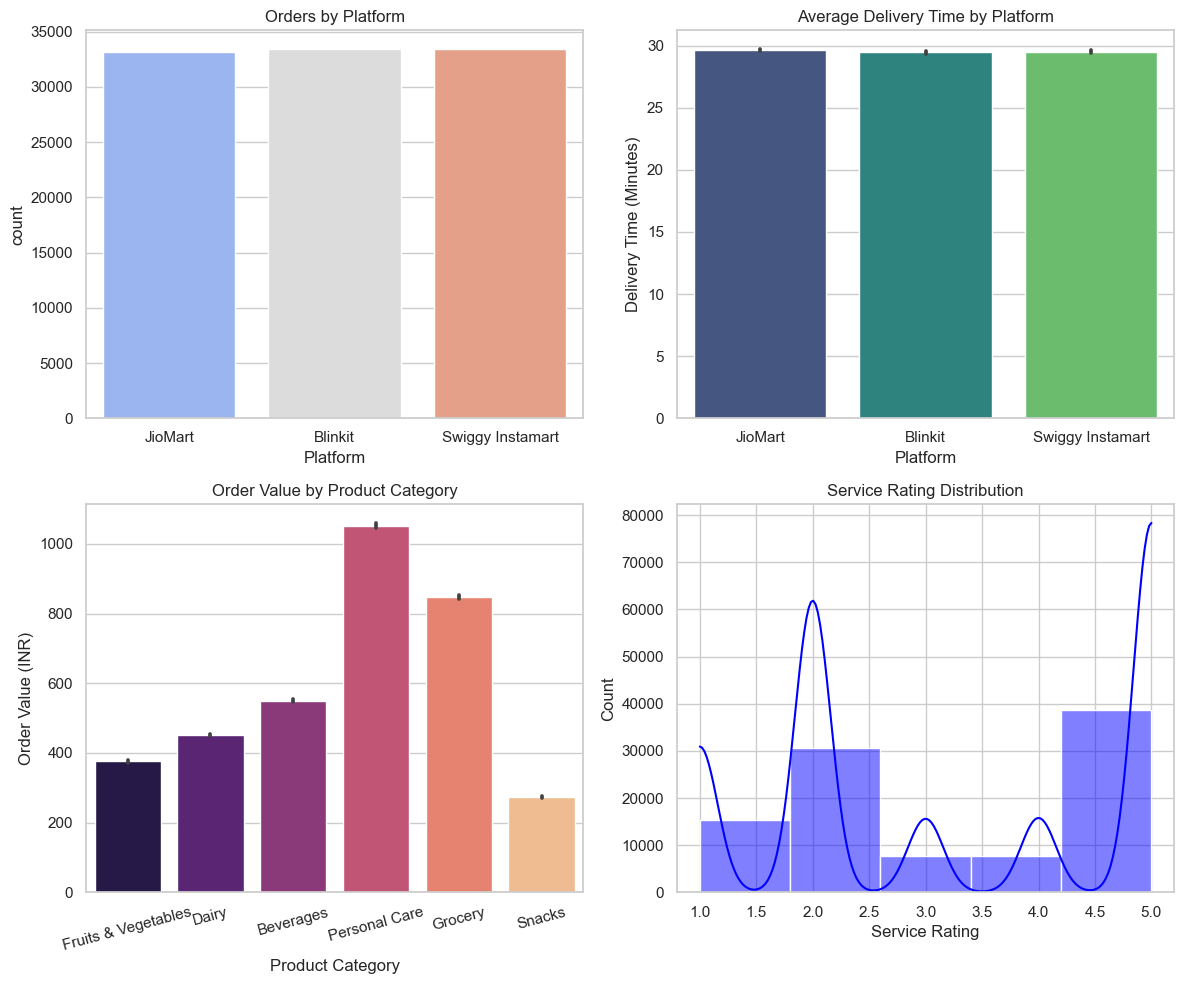

In [403]:
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Platform-wise Order Distribution
sns.countplot(data=df, x="Platform", ax=axes[0, 0], palette="coolwarm")
axes[0, 0].set_title("Orders by Platform")

# 2. Average Delivery Time by Platform
sns.barplot(data=df, x="Platform", y="Delivery Time (Minutes)", ax=axes[0, 1], palette="viridis")
axes[0, 1].set_title("Average Delivery Time by Platform")

# 3. Product Category vs. Order Value
sns.barplot(data=df, x="Product Category", y="Order Value (INR)", ax=axes[1, 0], palette="magma")
axes[1, 0].set_title("Order Value by Product Category")
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=15)

# 4. Service Rating Distribution
sns.histplot(df["Service Rating"], bins=5, kde=True, ax=axes[1, 1], color="blue")
axes[1, 1].set_title("Service Rating Distribution")

plt.tight_layout()
plt.show()

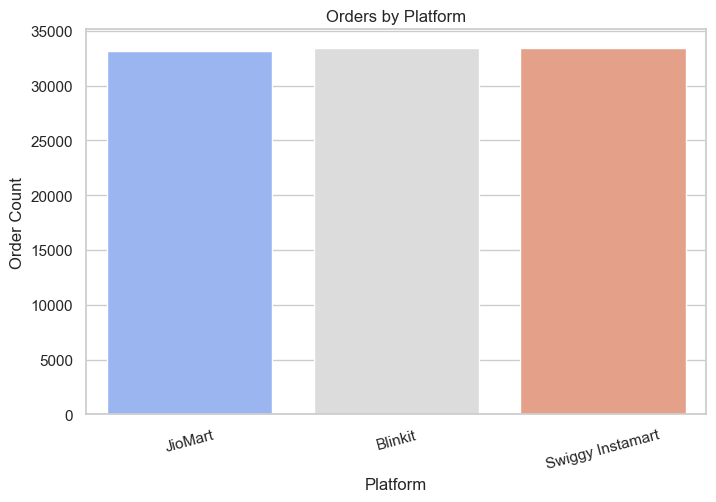

In [405]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Platform", palette="coolwarm")
plt.title("Orders by Platform")
plt.xlabel("Platform")
plt.ylabel("Order Count")
plt.xticks(rotation=15)
plt.show()

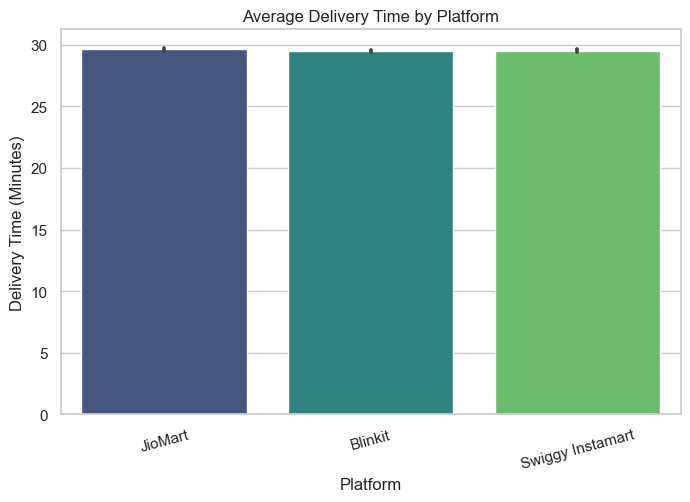

In [406]:
# 2. Average Delivery Time by Platform
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Platform", y="Delivery Time (Minutes)", palette="viridis")
plt.title("Average Delivery Time by Platform")
plt.xlabel("Platform")
plt.ylabel("Delivery Time (Minutes)")
plt.xticks(rotation=15)
plt.show()

D:\Users\praga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


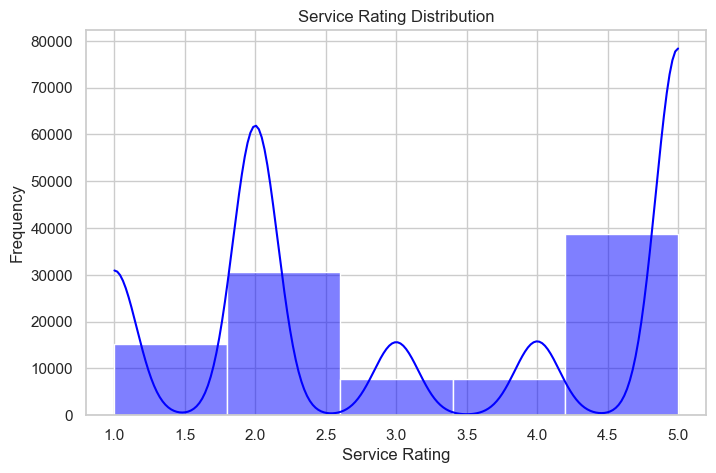

In [407]:
# 4. Service Rating Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Service Rating"], bins=5, kde=True, color="blue")
plt.title("Service Rating Distribution")
plt.xlabel("Service Rating")
plt.ylabel("Frequency")
plt.show()

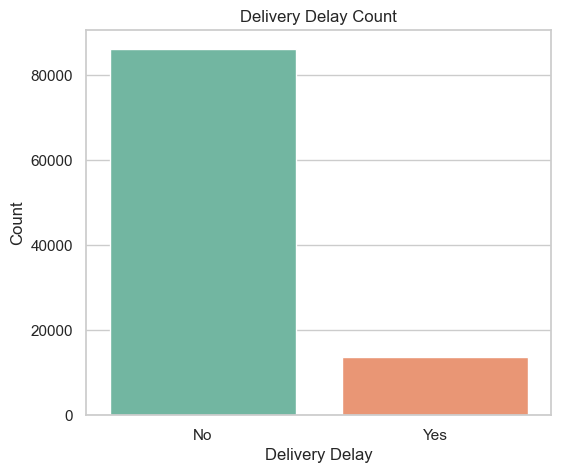

In [408]:
# 5. Delivery Delay Analysis
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x="Delivery Delay", palette="Set2")
plt.title("Delivery Delay Count")
plt.xlabel("Delivery Delay")
plt.ylabel("Count")
plt.show()

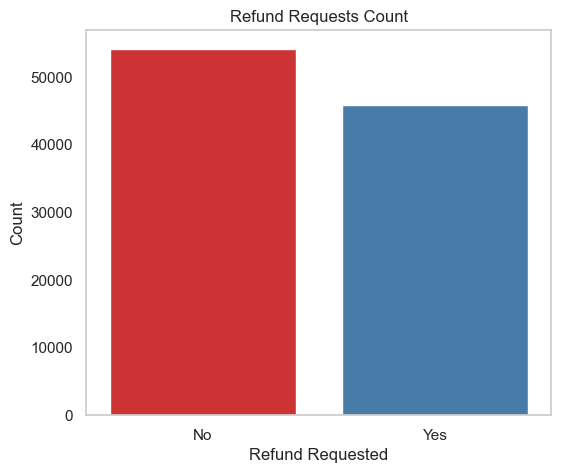

In [409]:
# 6. Refund Requests Analysis
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x="Refund Requested", palette="Set1")
plt.title("Refund Requests Count")
plt.xlabel("Refund Requested")
plt.ylabel("Count")
plt.grid(False)
plt.show()

In [411]:

Category_distribution=df['Product Category'].value_counts()
Category_distribution

Product Category
Dairy                  16857
Grocery                16737
Snacks                 16705
Fruits & Vegetables    16632
Beverages              16536
Personal Care          16533
Name: count, dtype: int64

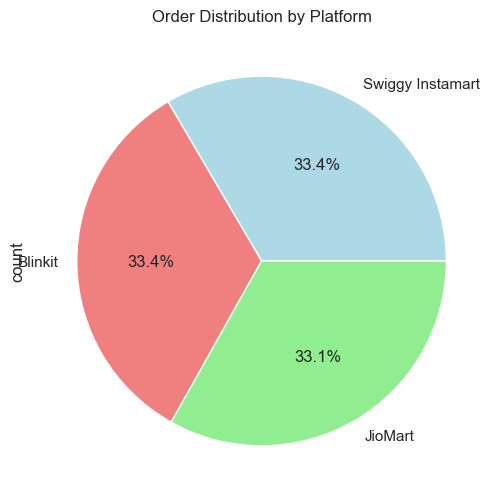

In [412]:
# 1. Pie Chart - Order Distribution by Platform
plt.figure(figsize=(6, 6))
df["Platform"].value_counts().plot.pie(autopct='%1.1f%%', colors=["lightblue", "lightcoral", "lightgreen"])
plt.title("Order Distribution by Platform")
plt.show()

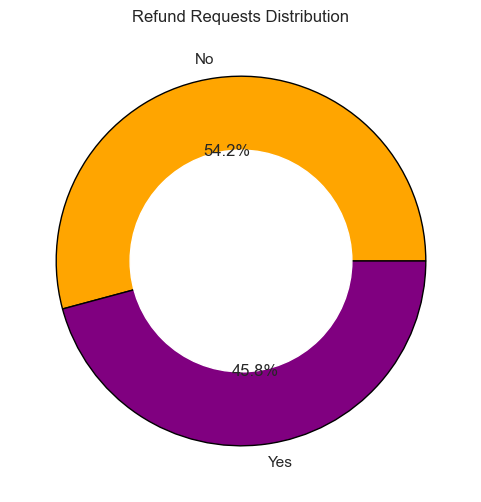

In [413]:
# 2. Donut Chart - Refund Requests
plt.figure(figsize=(6, 6))
refund_counts = df["Refund Requested"].value_counts()
plt.pie(refund_counts, labels=refund_counts.index, autopct='%1.1f%%', colors=["orange", "purple"], wedgeprops={"edgecolor": "black"})
plt.gca().add_artist(plt.Circle((0, 0), 0.6, color="white"))  # Create donut effect
plt.title("Refund Requests Distribution")
plt.show()

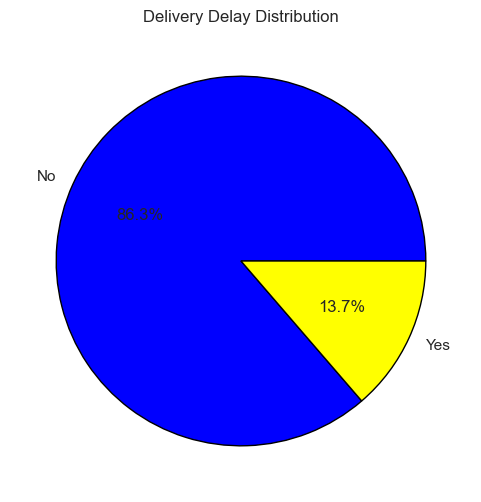

In [415]:
# 3. Pie Chart - Delivery Delay
plt.figure(figsize=(6, 6))
delay_counts = df["Delivery Delay"].value_counts()
plt.pie(delay_counts, labels=delay_counts.index, autopct='%1.1f%%', colors=["blue", "yellow"], wedgeprops={"edgecolor": "black"})
plt.title("Delivery Delay Distribution")
plt.show()

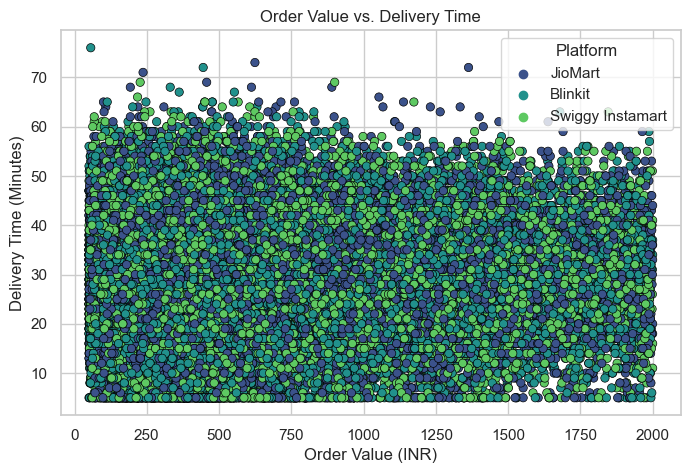

In [420]:
# 4. Scatter Plot - Order Value vs. Delivery Time
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Order Value (INR)", y="Delivery Time (Minutes)", hue="Platform", palette="viridis", edgecolor="black")
plt.title("Order Value vs. Delivery Time")
plt.xlabel("Order Value (INR)")
plt.ylabel("Delivery Time (Minutes)")
plt.legend(title="Platform")
plt.show()

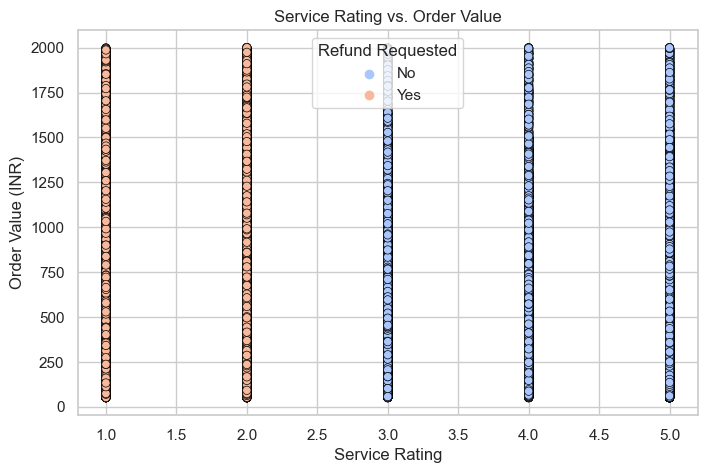

In [426]:
# 5. Scatter Plot - Service Rating vs. Order Value
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Service Rating", y="Order Value (INR)", hue="Refund Requested", palette="coolwarm", edgecolor="black")
plt.title("Service Rating vs. Order Value")
plt.xlabel("Service Rating")
plt.ylabel("Order Value (INR)")
plt.legend(title="Refund Requested")
plt.show()

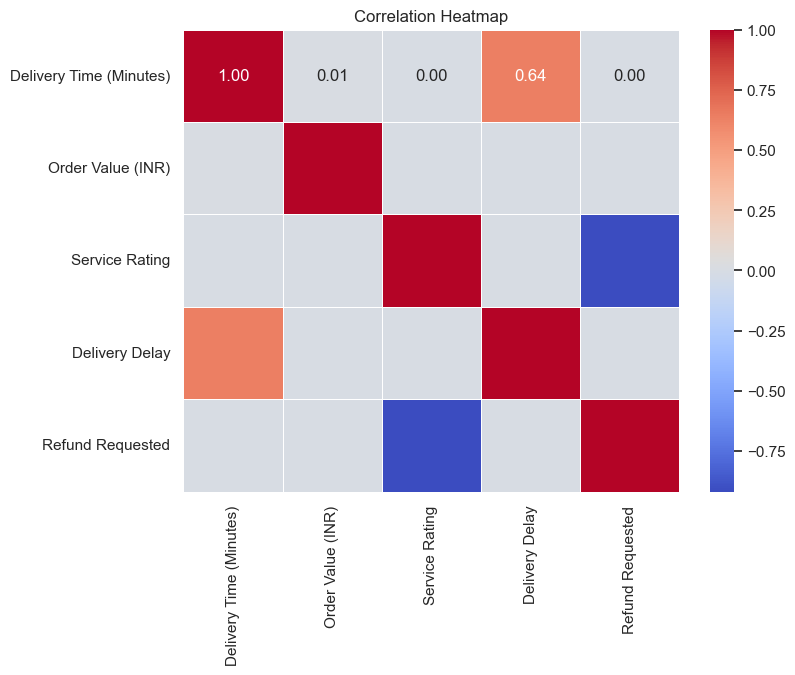

In [280]:
# Convert categorical columns to numerical for correlation analysis
df["Delivery Delay"] = df["Delivery Delay"].map({"Yes": 1, "No": 0})
df["Refund Requested"] = df["Refund Requested"].map({"Yes": 1, "No": 0})

# Selecting numerical columns for the heatmap
numerical_cols = ["Delivery Time (Minutes)", "Order Value (INR)", "Service Rating", "Delivery Delay", "Refund Requested"]

#heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

D:\Users\praga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\praga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\praga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


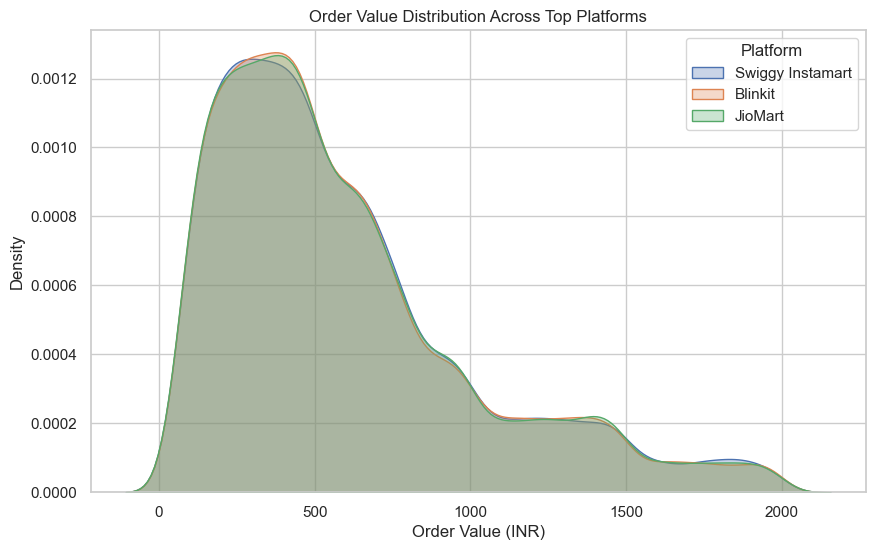

In [428]:
plt.figure(figsize=(10, 6))

# Get the top 3 most common platforms
top_platforms = df['Platform'].value_counts().head(3).index

# Plot KDE for "Order Value (INR)" across top platforms
for platform in top_platforms:
    sns.kdeplot(df[df['Platform'] == platform]['Order Value (INR)'], label=platform, fill=True, alpha=0.3)

# Set plot titles and labels
plt.title('Order Value Distribution Across Top Platforms')
plt.xlabel('Order Value (INR)')
plt.ylabel('Density')
plt.legend(title='Platform')
plt.show()

### Machine Learning Part

In [429]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [433]:
# Handle categorical variables
label_enc = LabelEncoder()
df["Platform"] = label_enc.fit_transform(df["Platform"])
df["Product Category"] = label_enc.fit_transform(df["Product Category"])
df["Customer Feedback"] = label_enc.fit_transform(df["Customer Feedback"])
df["Delivery Delay"] = df["Delivery Delay"].map({"Yes":1, "No":0})

In [443]:
print(df.columns)


Index(['Order ID', 'Customer ID', 'Platform', 'Order Date & Time',
       'Delivery Time (Minutes)', 'Product Category', 'Order Value (INR)',
       'Customer Feedback', 'Service Rating', 'Delivery Delay',
       'Refund Requested'],
      dtype='object')


In [445]:
features = ["Platform", "Order Value (INR)", "Service Rating", "Product Category", "Delivery Time (Minutes)"]
target = "Delivery Delay"

In [447]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.1, random_state=42)


In [449]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [451]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [453]:
# Make predictions
y_pred = model.predict(X_test)

In [455]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Model Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8636
           1       1.00      1.00      1.00      1364

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000


Confusion Matrix:
 [[8636    0]
 [   0 1364]]


In [461]:
for pred, true in zip(y_pred[:10], y_test[:10]):  # Show only first 10
    print(f"Predicted: {pred}, Actual: {true}")


Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0


In [459]:
# Make predictions
y_pred = model.predict(X_test)

# Print predicted vs actual values
for pred, true in zip(y_pred, y_test):
    print(f"Predicted: {pred}, Actual: {true}")

Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Ac

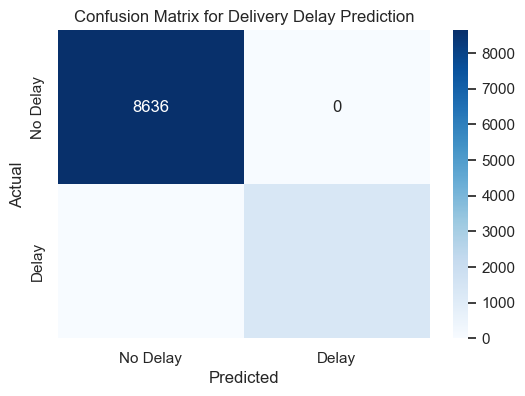

In [457]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No Delay", "Delay"], yticklabels=["No Delay", "Delay"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Delivery Delay Prediction")
plt.show()

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [10]:
# Encode Categorical Features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_cols = ['Platform', 'Product Category']
categorical_encoded = encoder.fit_transform(df[categorical_cols])
categorical_feature_names = encoder.get_feature_names_out(categorical_cols)
categorical_df = pd.DataFrame(categorical_encoded, columns=categorical_feature_names)

In [12]:
# Scale Numerical Features
scaler = MinMaxScaler()
numerical_cols = ['Order Value (INR)', 'Delivery Time (Minutes)', 'Service Rating']
numerical_scaled = scaler.fit_transform(df[numerical_cols])
numerical_df = pd.DataFrame(numerical_scaled, columns=numerical_cols)

In [14]:
# Process Text Data using NLP (TF-IDF)
tfidf = TfidfVectorizer(max_features=50)
text_features = tfidf.fit_transform(df['Customer Feedback'].fillna(""))
tfidf_df = pd.DataFrame(text_features.toarray(), columns=tfidf.get_feature_names_out())

In [15]:
# Combine Processed Data
X = pd.concat([categorical_df, numerical_df, tfidf_df], axis=1)
y_delay = df['Delivery Delay'].apply(lambda x: 1 if x == 'Yes' else 0)
y_refund = df['Refund Requested'].apply(lambda x: 1 if x == 'Yes' else 0)

In [18]:
# Ensure proper train-test split
X_train, X_test, y_delay_train, y_delay_test, y_refund_train, y_refund_test = train_test_split(
    X, y_delay, y_refund, test_size=0.2, random_state=42, stratify=y_delay)

In [20]:
# Reduce dimensionality using PCA
pca = PCA(n_components=0.95)  # Preserve 95% variance
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [22]:
# Train Models with Tuned Parameters
models = {
    "RandomForest": RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=50, learning_rate=0.05, max_depth=3, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=0.3, random_state=42)
}

trained_models_delay = {}
trained_models_refund = {}
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier()
adaboost = AdaBoostClassifier(algorithm="SAMME.R")


In [24]:
for name, model in models.items():
    print(f"Training {name} for Delivery Delay Prediction...")
    model.fit(X_train, y_delay_train)
    y_delay_pred = model.predict(X_test)
    print(f"{name} Accuracy for Delivery Delay:", accuracy_score(y_delay_test, y_delay_pred))
    print(classification_report(y_delay_test, y_delay_pred))
    trained_models_delay[name] = model
    
    print(f"Training {name} for Refund Request Prediction...")
    model.fit(X_train, y_refund_train)
    y_refund_pred = model.predict(X_test)
    print(f"{name} Accuracy for Refund Request:", accuracy_score(y_refund_test, y_refund_pred))
    print(classification_report(y_refund_test, y_refund_pred))
    trained_models_refund[name] = model

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_delay_train, cv=5)
    print(f"{name} Cross-validation accuracy for Delivery Delay: {cv_scores.mean()}")
    
    cv_scores = cross_val_score(model, X_train, y_refund_train, cv=5)
    print(f"{name} Cross-validation accuracy for Refund Request: {cv_scores.mean()}")


Training RandomForest for Delivery Delay Prediction...
RandomForest Accuracy for Delivery Delay: 0.8672
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     17266
           1       1.00      0.03      0.06      2734

    accuracy                           0.87     20000
   macro avg       0.93      0.51      0.49     20000
weighted avg       0.88      0.87      0.81     20000

Training RandomForest for Refund Request Prediction...
RandomForest Accuracy for Refund Request: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10988
           1       1.00      1.00      1.00      9012

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

RandomForest Cross-validation accuracy for Delivery Delay: 0.8667374999999999
RandomForest Cross-validation accuracy for Refund Request: 1.0


D:\Users\praga\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy for Delivery Delay: 0.86545
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     17266
           1       1.00      0.02      0.03      2734

    accuracy                           0.87     20000
   macro avg       0.93      0.51      0.48     20000
weighted avg       0.88      0.87      0.81     20000

Training AdaBoost for Refund Request Prediction...


D:\Users\praga\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy for Refund Request: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10988
           1       1.00      1.00      1.00      9012

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



D:\Users\praga\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Users\praga\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Users\praga\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Users\praga\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Users\pra

AdaBoost Cross-validation accuracy for Delivery Delay: 0.8648000000000001


D:\Users\praga\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Users\praga\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Users\praga\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Users\praga\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Users\pra

AdaBoost Cross-validation accuracy for Refund Request: 1.0


## After Tuning

In [34]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

In [36]:
from sklearn.model_selection import RandomizedSearchCV 
params_abc = {'n_estimators': [int(x) for x in np.linspace(start = 1, stop = 50, num = 15)],
          'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
          }   
abc_random = RandomizedSearchCV(random_state=49,estimator=AdaBoostClassifier,param_distributions = params_abc,n_iter =50,cv=5,n_jobs=-1)


In [38]:
params_abc

{'n_estimators': [1, 4, 8, 11, 15, 18, 22, 25, 29, 32, 36, 39, 43, 46, 50],
 'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04]}

In [40]:
print('Accuracy of GradientBoosting(tuned)=', accuracy_score(y_delay_test, pred_grad_tuned))


NameError: name 'pred_grad_tuned' is not defined

In [ ]:
import joblib

# Save the tuned model
joblib.dump(grad_tuned, 'gradient_boosting_tuned.pkl')
print("Tuned Gradient Boosting model saved successfully!")


In [ ]:
# Load the model
grad_tuned_loaded = joblib.load('gradient_boosting_tuned.pkl')
print("Tuned Gradient Boosting model loaded successfully!")

# Example usage (predict on test data)
predictions = grad_tuned_loaded.predict(X_test)
print('Accuracy of Loaded Model:', accuracy_score(y_delay_test, predictions))
